In [60]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import optuna.integration.lightgbm as lgb 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import optuna
import numpy as np
import optuna.integration.lightgbm as lgb

from lightgbm import early_stopping
from lightgbm import log_evaluation
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

load_dotenv(verbose=True)

raw_data_dir = os.environ.get("RAW_DATA")

In [61]:
%load_ext watermark
%watermark -n -u -v -iv -d

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-03-31

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.11.0

pandas    : 1.5.3
optuna    : 3.1.0
sklearn   : 1.2.2
matplotlib: 3.7.1
numpy     : 1.24.2
seaborn   : 0.12.2



In [62]:
df = pd.read_csv(raw_data_dir + '/status.csv')

In [63]:
df

,id,year,month,day,hour,station_id,bikes_available,predict
0,0,2013,9,1,0,0,11.0,0
1,1,2013,9,1,1,0,11.0,0
2,2,2013,9,1,2,0,11.0,0
3,3,2013,9,1,3,0,11.0,0
4,4,2013,9,1,4,0,11.0,0
...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0
1226396,1226396,2015,8,31,20,69,8.0,0
1226397,1226397,2015,8,31,21,69,8.0,0
1226398,1226398,2015,8,31,22,69,8.0,0


In [64]:
local_df = df[df['predict'] == 0]

In [65]:
local_label = test_df['bikes_available']

In [66]:
local_features = test_df.drop(columns=['predict','bikes_available'])

In [67]:
train_x, test_x, train_y, test_y = train_test_split(local_features, local_label, test_size=0.25)
dtrain = lgb.Dataset(train_x, label=train_y)
dval = lgb.Dataset(test_x, label=test_y)

In [68]:
#from sklearn.ensemble import RandomForestRegressor
#regr = RandomForestRegressor(max_depth=15, random_state=0)
#regr.fit(train_X, train_y)

In [69]:
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

model = lgb.train(
    params,
    dtrain,
    valid_sets=[dtrain, dval],
    callbacks=[early_stopping(100), log_evaluation(100)],
)

[I 2023-03-31 07:15:13,487] A new study created in memory with name: no-name-e7e20980-21e5-46a6-9546-f6c9d54f9ff1
feature_fraction, val_score: inf:   0%|                                                    | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.183164	valid_1's binary_logloss: 0.183023
[200]	valid_0's binary_logloss: 0.150207	valid_1's binary_logloss: 0.150793
[300]	valid_0's binary_logloss: 0.14442	valid_1's binary_logloss: 0.145668
[400]	valid_0's binary_logloss: 0.125738	valid_1's binary_logloss: 0.127431
[500]	valid_0's binary_logloss: 0.109856	valid_1's binary_logloss: 0.112054
[600]	valid_0's binary_logloss: 0.0941894	valid_1's binary_logloss: 0.0967664
[700]	valid_0's binary_logloss: 0.0893784	valid_1's binary_logloss: 0.0923783
[800]	valid_0's binary_logloss: 0.0788332	valid_1's binary_logloss: 0.082042
[900]	valid_0's binary_logloss: 0.0687016	valid_1's binary_logloss: 0.0721842


feature_fraction, val_score: 0.068010:  14%|#####5                                 | 1/7 [00:12<01:13, 12.18s/it]

[1000]	valid_0's binary_logloss: 0.0643142	valid_1's binary_logloss: 0.0680096
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0643142	valid_1's binary_logloss: 0.0680096
[100]	valid_0's binary_logloss: 0.154011	valid_1's binary_logloss: 0.154456
[200]	valid_0's binary_logloss: 0.113347	valid_1's binary_logloss: 0.114502
[300]	valid_0's binary_logloss: 0.0767429	valid_1's binary_logloss: 0.0784815
[400]	valid_0's binary_logloss: 0.0648693	valid_1's binary_logloss: 0.0677409
[500]	valid_0's binary_logloss: 0.0542177	valid_1's binary_logloss: 0.0575244
[600]	valid_0's binary_logloss: 0.0469423	valid_1's binary_logloss: 0.0513552
[700]	valid_0's binary_logloss: 0.0406251	valid_1's binary_logloss: 0.0458527
[800]	valid_0's binary_logloss: 0.0359096	valid_1's binary_logloss: 0.0415733
[900]	valid_0's binary_logloss: 0.0321382	valid_1's binary_logloss: 0.0386778


feature_fraction, val_score: 0.036529:  29%|###########1                           | 2/7 [00:25<01:02, 12.60s/it]

[1000]	valid_0's binary_logloss: 0.0295455	valid_1's binary_logloss: 0.0365293
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0295455	valid_1's binary_logloss: 0.0365293
[100]	valid_0's binary_logloss: 0.112355	valid_1's binary_logloss: 0.112836
[200]	valid_0's binary_logloss: 0.0729623	valid_1's binary_logloss: 0.0740891
[300]	valid_0's binary_logloss: 0.0535098	valid_1's binary_logloss: 0.0557281
[400]	valid_0's binary_logloss: 0.0480059	valid_1's binary_logloss: 0.0517581
[500]	valid_0's binary_logloss: 0.0388357	valid_1's binary_logloss: 0.0431419
[600]	valid_0's binary_logloss: 0.0345783	valid_1's binary_logloss: 0.0394887
[700]	valid_0's binary_logloss: 0.031191	valid_1's binary_logloss: 0.0380434
[800]	valid_0's binary_logloss: 0.0298044	valid_1's binary_logloss: 0.0391159
[900]	valid_0's binary_logloss: 0.0275759	valid_1's binary_logloss: 0.0394873


feature_fraction, val_score: 0.036529:  43%|################7                      | 3/7 [00:40<00:55, 13.76s/it]

[1000]	valid_0's binary_logloss: 0.0255077	valid_1's binary_logloss: 0.0387505
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0255077	valid_1's binary_logloss: 0.0387505
[100]	valid_0's binary_logloss: 0.276038	valid_1's binary_logloss: 0.275831
[200]	valid_0's binary_logloss: 0.221602	valid_1's binary_logloss: 0.221384
[300]	valid_0's binary_logloss: 0.189783	valid_1's binary_logloss: 0.189803
[400]	valid_0's binary_logloss: 0.17887	valid_1's binary_logloss: 0.179089
[500]	valid_0's binary_logloss: 0.162457	valid_1's binary_logloss: 0.162929
[600]	valid_0's binary_logloss: 0.150866	valid_1's binary_logloss: 0.151506
[700]	valid_0's binary_logloss: 0.147692	valid_1's binary_logloss: 0.148609
[800]	valid_0's binary_logloss: 0.140797	valid_1's binary_logloss: 0.141922
[900]	valid_0's binary_logloss: 0.123963	valid_1's binary_logloss: 0.125293


feature_fraction, val_score: 0.036529:  57%|######################2                | 4/7 [01:02<00:51, 17.15s/it]

[1000]	valid_0's binary_logloss: 0.115469	valid_1's binary_logloss: 0.116973
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0255077	valid_1's binary_logloss: 0.0387505
[100]	valid_0's binary_logloss: 0.0970034	valid_1's binary_logloss: 0.0974613
[200]	valid_0's binary_logloss: 0.0569609	valid_1's binary_logloss: 0.0590737
[300]	valid_0's binary_logloss: 0.0450574	valid_1's binary_logloss: 0.0482875
[400]	valid_0's binary_logloss: 0.0377369	valid_1's binary_logloss: 0.0434815
[500]	valid_0's binary_logloss: 0.0320994	valid_1's binary_logloss: 0.0374685
[600]	valid_0's binary_logloss: 0.0278972	valid_1's binary_logloss: 0.0340642
[700]	valid_0's binary_logloss: 0.0259739	valid_1's binary_logloss: 0.0331136
[800]	valid_0's binary_logloss: 0.0250105	valid_1's binary_logloss: 0.0338408


feature_fraction, val_score: 0.032738:  71%|###########################8           | 5/7 [01:13<00:29, 14.75s/it]

Early stopping, best iteration is:
[730]	valid_0's binary_logloss: 0.025479	valid_1's binary_logloss: 0.0327385
[100]	valid_0's binary_logloss: 0.112355	valid_1's binary_logloss: 0.112836
[200]	valid_0's binary_logloss: 0.0729623	valid_1's binary_logloss: 0.0740891
[300]	valid_0's binary_logloss: 0.0535098	valid_1's binary_logloss: 0.0557281
[400]	valid_0's binary_logloss: 0.0480059	valid_1's binary_logloss: 0.0517581
[500]	valid_0's binary_logloss: 0.0388357	valid_1's binary_logloss: 0.0431419
[600]	valid_0's binary_logloss: 0.0345783	valid_1's binary_logloss: 0.0394887
[700]	valid_0's binary_logloss: 0.031191	valid_1's binary_logloss: 0.0380434
[800]	valid_0's binary_logloss: 0.0298044	valid_1's binary_logloss: 0.0391159


feature_fraction, val_score: 0.032738:  86%|#################################4     | 6/7 [01:22<00:13, 13.05s/it]

Early stopping, best iteration is:
[730]	valid_0's binary_logloss: 0.025479	valid_1's binary_logloss: 0.0327385
[100]	valid_0's binary_logloss: 0.154011	valid_1's binary_logloss: 0.154456
[200]	valid_0's binary_logloss: 0.113347	valid_1's binary_logloss: 0.114502
[300]	valid_0's binary_logloss: 0.0767429	valid_1's binary_logloss: 0.0784815
[400]	valid_0's binary_logloss: 0.0648693	valid_1's binary_logloss: 0.0677409
[500]	valid_0's binary_logloss: 0.0542177	valid_1's binary_logloss: 0.0575244
[600]	valid_0's binary_logloss: 0.0469423	valid_1's binary_logloss: 0.0513552
[700]	valid_0's binary_logloss: 0.0406251	valid_1's binary_logloss: 0.0458527
[800]	valid_0's binary_logloss: 0.0359096	valid_1's binary_logloss: 0.0415733


feature_fraction, val_score: 0.032738: 100%|#######################################| 7/7 [01:35<00:00, 13.61s/it]


Early stopping, best iteration is:
[730]	valid_0's binary_logloss: 0.025479	valid_1's binary_logloss: 0.0327385


num_leaves, val_score: 0.032738:   0%|                                                    | 0/20 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.0256298	valid_1's binary_logloss: 0.0316655
[200]	valid_0's binary_logloss: 0.0131795	valid_1's binary_logloss: 0.0229548
[300]	valid_0's binary_logloss: 0.00946941	valid_1's binary_logloss: 0.0218877
[400]	valid_0's binary_logloss: 0.00720298	valid_1's binary_logloss: 0.0217419


num_leaves, val_score: 0.021666:   5%|##2                                         | 1/20 [00:15<04:45, 15.03s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0261068	valid_1's binary_logloss: 0.0305948
[200]	valid_0's binary_logloss: 0.017091	valid_1's binary_logloss: 0.0259969
[300]	valid_0's binary_logloss: 0.0316981	valid_1's binary_logloss: 0.0447111
[400]	valid_0's binary_logloss: 0.0291009	valid_1's binary_logloss: 0.0592241


num_leaves, val_score: 0.021666:  10%|####4                                       | 2/20 [00:24<03:30, 11.69s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0237078	valid_1's binary_logloss: 0.0297387
[200]	valid_0's binary_logloss: 0.0175428	valid_1's binary_logloss: 0.0324473
[300]	valid_0's binary_logloss: 0.11455	valid_1's binary_logloss: 0.139484
[400]	valid_0's binary_logloss: 0.37888	valid_1's binary_logloss: 0.403809


num_leaves, val_score: 0.021666:  15%|######6                                     | 3/20 [00:36<03:23, 11.98s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0326985	valid_1's binary_logloss: 0.0385283
[200]	valid_0's binary_logloss: 0.021864	valid_1's binary_logloss: 0.0321472
[300]	valid_0's binary_logloss: 0.0293123	valid_1's binary_logloss: 0.0421357
[400]	valid_0's binary_logloss: 0.0300016	valid_1's binary_logloss: 0.0481104


num_leaves, val_score: 0.021666:  20%|########8                                   | 4/20 [00:45<02:52, 10.78s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.126479	valid_1's binary_logloss: 0.126641
[200]	valid_0's binary_logloss: 0.0846946	valid_1's binary_logloss: 0.0855612
[300]	valid_0's binary_logloss: 0.0664237	valid_1's binary_logloss: 0.0674729
[400]	valid_0's binary_logloss: 0.0535485	valid_1's binary_logloss: 0.0553965


num_leaves, val_score: 0.021666:  25%|###########                                 | 5/20 [00:50<02:10,  8.73s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0566718	valid_1's binary_logloss: 0.0582902
[200]	valid_0's binary_logloss: 0.0410506	valid_1's binary_logloss: 0.0453954
[300]	valid_0's binary_logloss: 0.0329118	valid_1's binary_logloss: 0.0390127
[400]	valid_0's binary_logloss: 0.027789	valid_1's binary_logloss: 0.0370197


num_leaves, val_score: 0.021666:  30%|#############2                              | 6/20 [00:57<01:52,  8.03s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.025031	valid_1's binary_logloss: 0.0309928
[200]	valid_0's binary_logloss: 0.0156949	valid_1's binary_logloss: 0.0267881
[300]	valid_0's binary_logloss: 0.126897	valid_1's binary_logloss: 0.157573
[400]	valid_0's binary_logloss: 1.21458	valid_1's binary_logloss: 1.2712


num_leaves, val_score: 0.021666:  35%|###############4                            | 7/20 [01:08<01:58,  9.08s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.223684	valid_1's binary_logloss: 0.223742
[200]	valid_0's binary_logloss: 0.17673	valid_1's binary_logloss: 0.17678
[300]	valid_0's binary_logloss: 0.146007	valid_1's binary_logloss: 0.146117
[400]	valid_0's binary_logloss: 0.120394	valid_1's binary_logloss: 0.120608


num_leaves, val_score: 0.021666:  40%|#################6                          | 8/20 [01:13<01:32,  7.73s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.026178	valid_1's binary_logloss: 0.0324291
[200]	valid_0's binary_logloss: 0.0138004	valid_1's binary_logloss: 0.0237148
[300]	valid_0's binary_logloss: 0.00955619	valid_1's binary_logloss: 0.0222368
[400]	valid_0's binary_logloss: 0.00718157	valid_1's binary_logloss: 0.0217614


num_leaves, val_score: 0.021666:  45%|###################8                        | 9/20 [01:23<01:34,  8.56s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0317861	valid_1's binary_logloss: 0.036406
[200]	valid_0's binary_logloss: 0.030097	valid_1's binary_logloss: 0.0392109
[300]	valid_0's binary_logloss: 0.0180086	valid_1's binary_logloss: 0.0298945
[400]	valid_0's binary_logloss: 0.0156878	valid_1's binary_logloss: 0.0295866


num_leaves, val_score: 0.021666:  50%|#####################5                     | 10/20 [01:32<01:24,  8.49s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0266285	valid_1's binary_logloss: 0.03138
[200]	valid_0's binary_logloss: 0.0195309	valid_1's binary_logloss: 0.0306376
[300]	valid_0's binary_logloss: 0.0275051	valid_1's binary_logloss: 0.0496901
[400]	valid_0's binary_logloss: 0.216789	valid_1's binary_logloss: 0.254827


num_leaves, val_score: 0.021666:  55%|#######################6                   | 11/20 [01:46<01:33, 10.37s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0295277	valid_1's binary_logloss: 0.0338644
[200]	valid_0's binary_logloss: 0.0193984	valid_1's binary_logloss: 0.0315566
[300]	valid_0's binary_logloss: 0.0428194	valid_1's binary_logloss: 0.0701844
[400]	valid_0's binary_logloss: 0.250274	valid_1's binary_logloss: 0.283135


num_leaves, val_score: 0.021666:  60%|#########################8                 | 12/20 [02:01<01:34, 11.82s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0295277	valid_1's binary_logloss: 0.0338644
[200]	valid_0's binary_logloss: 0.0193984	valid_1's binary_logloss: 0.0315566
[300]	valid_0's binary_logloss: 0.0456395	valid_1's binary_logloss: 0.0674156
[400]	valid_0's binary_logloss: 0.257415	valid_1's binary_logloss: 0.287473


num_leaves, val_score: 0.021666:  65%|###########################9               | 13/20 [02:14<01:23, 11.93s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0247138	valid_1's binary_logloss: 0.0293634
[200]	valid_0's binary_logloss: 0.015274	valid_1's binary_logloss: 0.0240314
[300]	valid_0's binary_logloss: 0.0112205	valid_1's binary_logloss: 0.0228336
[400]	valid_0's binary_logloss: 0.00849647	valid_1's binary_logloss: 0.0222363


num_leaves, val_score: 0.021666:  70%|##############################1            | 14/20 [02:28<01:16, 12.76s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0368116	valid_1's binary_logloss: 0.0398303
[200]	valid_0's binary_logloss: 0.0270989	valid_1's binary_logloss: 0.0336066
[300]	valid_0's binary_logloss: 0.0374476	valid_1's binary_logloss: 0.0457195
[400]	valid_0's binary_logloss: 0.0185121	valid_1's binary_logloss: 0.028237


num_leaves, val_score: 0.021666:  75%|################################2          | 15/20 [02:38<00:58, 11.67s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0319722	valid_1's binary_logloss: 0.0371928
[200]	valid_0's binary_logloss: 0.0208917	valid_1's binary_logloss: 0.0298101
[300]	valid_0's binary_logloss: 0.0174446	valid_1's binary_logloss: 0.0303184
[400]	valid_0's binary_logloss: 0.0475917	valid_1's binary_logloss: 0.0802626


num_leaves, val_score: 0.021666:  80%|##################################4        | 16/20 [02:49<00:46, 11.61s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0319722	valid_1's binary_logloss: 0.0371928
[200]	valid_0's binary_logloss: 0.0259681	valid_1's binary_logloss: 0.0357106
[300]	valid_0's binary_logloss: 0.0318313	valid_1's binary_logloss: 0.0409069
[400]	valid_0's binary_logloss: 0.0443617	valid_1's binary_logloss: 0.0737989


num_leaves, val_score: 0.021666:  85%|####################################5      | 17/20 [02:58<00:32, 10.84s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0254617	valid_1's binary_logloss: 0.0322351
[200]	valid_0's binary_logloss: 0.0156	valid_1's binary_logloss: 0.0269717
[300]	valid_0's binary_logloss: 0.0109756	valid_1's binary_logloss: 0.0253745
[400]	valid_0's binary_logloss: 0.0694818	valid_1's binary_logloss: 0.106713


num_leaves, val_score: 0.021666:  90%|######################################7    | 18/20 [03:09<00:21, 10.82s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.031139	valid_1's binary_logloss: 0.0346031
[200]	valid_0's binary_logloss: 0.0197657	valid_1's binary_logloss: 0.0277958
[300]	valid_0's binary_logloss: 0.0240397	valid_1's binary_logloss: 0.0380702
[400]	valid_0's binary_logloss: 0.0321558	valid_1's binary_logloss: 0.0570761


num_leaves, val_score: 0.021666:  95%|########################################8  | 19/20 [03:19<00:10, 10.68s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0359333	valid_1's binary_logloss: 0.0403558
[200]	valid_0's binary_logloss: 0.0270842	valid_1's binary_logloss: 0.0342072
[300]	valid_0's binary_logloss: 0.0244736	valid_1's binary_logloss: 0.0360859
[400]	valid_0's binary_logloss: 0.0307609	valid_1's binary_logloss: 0.0450864


num_leaves, val_score: 0.021666: 100%|###########################################| 20/20 [03:28<00:00, 10.41s/it]


Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656


bagging, val_score: 0.021666:   0%|                                                       | 0/10 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.0228063	valid_1's binary_logloss: 0.0292025
[200]	valid_0's binary_logloss: 0.014141	valid_1's binary_logloss: 0.0259508
[300]	valid_0's binary_logloss: 0.0176233	valid_1's binary_logloss: 0.0344849
[400]	valid_0's binary_logloss: 0.200983	valid_1's binary_logloss: 0.240461


bagging, val_score: 0.021666:  10%|####7                                          | 1/10 [00:12<01:50, 12.28s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0228103	valid_1's binary_logloss: 0.0291587
[200]	valid_0's binary_logloss: 0.0137278	valid_1's binary_logloss: 0.0256861
[300]	valid_0's binary_logloss: 0.0275275	valid_1's binary_logloss: 0.0511468
[400]	valid_0's binary_logloss: 0.522056	valid_1's binary_logloss: 0.544742


bagging, val_score: 0.021666:  20%|#########4                                     | 2/10 [00:24<01:38, 12.29s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0228521	valid_1's binary_logloss: 0.0298714
[200]	valid_0's binary_logloss: 0.0143625	valid_1's binary_logloss: 0.0262518
[300]	valid_0's binary_logloss: 0.0302273	valid_1's binary_logloss: 0.0515695
[400]	valid_0's binary_logloss: 0.532254	valid_1's binary_logloss: 0.56303


bagging, val_score: 0.021666:  30%|##############1                                | 3/10 [00:37<01:28, 12.61s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0259701	valid_1's binary_logloss: 0.0315086
[200]	valid_0's binary_logloss: 0.0132153	valid_1's binary_logloss: 0.0239087
[300]	valid_0's binary_logloss: 0.0142855	valid_1's binary_logloss: 0.0288485
[400]	valid_0's binary_logloss: 0.197659	valid_1's binary_logloss: 0.237138


bagging, val_score: 0.021666:  40%|##################8                            | 4/10 [00:52<01:20, 13.35s/it]

Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.00777246	valid_1's binary_logloss: 0.0216656
[100]	valid_0's binary_logloss: 0.0225033	valid_1's binary_logloss: 0.0281397
[200]	valid_0's binary_logloss: 0.013965	valid_1's binary_logloss: 0.0238898
[300]	valid_0's binary_logloss: 0.00939774	valid_1's binary_logloss: 0.0220636
[400]	valid_0's binary_logloss: 0.00681257	valid_1's binary_logloss: 0.02158
[500]	valid_0's binary_logloss: 0.00486853	valid_1's binary_logloss: 0.0215335


bagging, val_score: 0.021444:  50%|#######################5                       | 5/10 [01:17<01:28, 17.74s/it]

Early stopping, best iteration is:
[427]	valid_0's binary_logloss: 0.00612942	valid_1's binary_logloss: 0.0214441
[100]	valid_0's binary_logloss: 0.022887	valid_1's binary_logloss: 0.0292965
[200]	valid_0's binary_logloss: 0.0131148	valid_1's binary_logloss: 0.0245777
[300]	valid_0's binary_logloss: 0.0100317	valid_1's binary_logloss: 0.0252873
[400]	valid_0's binary_logloss: 0.00736129	valid_1's binary_logloss: 0.0247686
[500]	valid_0's binary_logloss: 0.0349352	valid_1's binary_logloss: 0.0588033


bagging, val_score: 0.021444:  60%|############################2                  | 6/10 [01:46<01:26, 21.55s/it]

Early stopping, best iteration is:
[427]	valid_0's binary_logloss: 0.00612942	valid_1's binary_logloss: 0.0214441
[100]	valid_0's binary_logloss: 0.0238613	valid_1's binary_logloss: 0.03048
[200]	valid_0's binary_logloss: 0.0139011	valid_1's binary_logloss: 0.0248146
[300]	valid_0's binary_logloss: 0.00951588	valid_1's binary_logloss: 0.0233683
[400]	valid_0's binary_logloss: 0.00752183	valid_1's binary_logloss: 0.0238709
[500]	valid_0's binary_logloss: 0.00841844	valid_1's binary_logloss: 0.0304088


bagging, val_score: 0.021444:  70%|################################9              | 7/10 [01:59<00:56, 18.76s/it]

Early stopping, best iteration is:
[427]	valid_0's binary_logloss: 0.00612942	valid_1's binary_logloss: 0.0214441
[100]	valid_0's binary_logloss: 0.0238741	valid_1's binary_logloss: 0.0297822
[200]	valid_0's binary_logloss: 0.0146472	valid_1's binary_logloss: 0.0246737
[300]	valid_0's binary_logloss: 0.00931258	valid_1's binary_logloss: 0.0221684
[400]	valid_0's binary_logloss: 0.00678093	valid_1's binary_logloss: 0.0216317
[500]	valid_0's binary_logloss: 0.00511881	valid_1's binary_logloss: 0.0216467


bagging, val_score: 0.021444:  80%|#####################################6         | 8/10 [02:11<00:32, 16.47s/it]

Early stopping, best iteration is:
[427]	valid_0's binary_logloss: 0.00612942	valid_1's binary_logloss: 0.0214441
[100]	valid_0's binary_logloss: 0.0218379	valid_1's binary_logloss: 0.0276905
[200]	valid_0's binary_logloss: 0.012863	valid_1's binary_logloss: 0.0228582
[300]	valid_0's binary_logloss: 0.00871705	valid_1's binary_logloss: 0.0214615
[400]	valid_0's binary_logloss: 0.00640635	valid_1's binary_logloss: 0.0213618
[500]	valid_0's binary_logloss: 0.00484131	valid_1's binary_logloss: 0.0214575


bagging, val_score: 0.021286:  90%|##########################################3    | 9/10 [02:22<00:15, 15.02s/it]

Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861
[100]	valid_0's binary_logloss: 0.0224317	valid_1's binary_logloss: 0.0287654
[200]	valid_0's binary_logloss: 0.0161321	valid_1's binary_logloss: 0.0289295
[300]	valid_0's binary_logloss: 0.0973976	valid_1's binary_logloss: 0.118023
[400]	valid_0's binary_logloss: 0.797696	valid_1's binary_logloss: 0.831038
[500]	valid_0's binary_logloss: 2.51096	valid_1's binary_logloss: 2.57147


bagging, val_score: 0.021286: 100%|##############################################| 10/10 [02:36<00:00, 15.61s/it]


Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861


feature_fraction_stage2, val_score: 0.021286:   0%|                                        | 0/3 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.0218379	valid_1's binary_logloss: 0.0276905
[200]	valid_0's binary_logloss: 0.012863	valid_1's binary_logloss: 0.0228582
[300]	valid_0's binary_logloss: 0.00871705	valid_1's binary_logloss: 0.0214615
[400]	valid_0's binary_logloss: 0.00640635	valid_1's binary_logloss: 0.0213618
[500]	valid_0's binary_logloss: 0.00484131	valid_1's binary_logloss: 0.0214575


feature_fraction_stage2, val_score: 0.021286:  33%|##########6                     | 1/3 [00:12<00:25, 12.84s/it]

Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861
[100]	valid_0's binary_logloss: 0.0218379	valid_1's binary_logloss: 0.0276905
[200]	valid_0's binary_logloss: 0.012863	valid_1's binary_logloss: 0.0228582
[300]	valid_0's binary_logloss: 0.00871705	valid_1's binary_logloss: 0.0214615
[400]	valid_0's binary_logloss: 0.00640635	valid_1's binary_logloss: 0.0213618
[500]	valid_0's binary_logloss: 0.00484131	valid_1's binary_logloss: 0.0214575


feature_fraction_stage2, val_score: 0.021286:  67%|#####################3          | 2/3 [00:25<00:12, 12.85s/it]

Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861
[100]	valid_0's binary_logloss: 0.0218379	valid_1's binary_logloss: 0.0276905
[200]	valid_0's binary_logloss: 0.012863	valid_1's binary_logloss: 0.0228582
[300]	valid_0's binary_logloss: 0.00871705	valid_1's binary_logloss: 0.0214615
[400]	valid_0's binary_logloss: 0.00640635	valid_1's binary_logloss: 0.0213618
[500]	valid_0's binary_logloss: 0.00484131	valid_1's binary_logloss: 0.0214575


feature_fraction_stage2, val_score: 0.021286: 100%|################################| 3/3 [00:37<00:00, 12.66s/it]


Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861


regularization_factors, val_score: 0.021286:   0%|                                        | 0/20 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.0251386	valid_1's binary_logloss: 0.0278322
[200]	valid_0's binary_logloss: 0.0190678	valid_1's binary_logloss: 0.023948
[300]	valid_0's binary_logloss: 0.0158188	valid_1's binary_logloss: 0.0225003
[400]	valid_0's binary_logloss: 0.0138055	valid_1's binary_logloss: 0.021927
[500]	valid_0's binary_logloss: 0.0122677	valid_1's binary_logloss: 0.02162


regularization_factors, val_score: 0.021286:   5%|#6                              | 1/20 [00:15<04:58, 15.69s/it]

Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861
[100]	valid_0's binary_logloss: 0.0223489	valid_1's binary_logloss: 0.0285773
[200]	valid_0's binary_logloss: 0.0130389	valid_1's binary_logloss: 0.0233208
[300]	valid_0's binary_logloss: 0.00881238	valid_1's binary_logloss: 0.0218468
[400]	valid_0's binary_logloss: 0.00642785	valid_1's binary_logloss: 0.0216486
[500]	valid_0's binary_logloss: 0.00478929	valid_1's binary_logloss: 0.0217298


regularization_factors, val_score: 0.021286:  10%|###2                            | 2/20 [00:27<04:02, 13.45s/it]

Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861
[100]	valid_0's binary_logloss: 0.0232871	valid_1's binary_logloss: 0.0295159
[200]	valid_0's binary_logloss: 0.0129025	valid_1's binary_logloss: 0.0239297
[300]	valid_0's binary_logloss: 0.00886822	valid_1's binary_logloss: 0.0225985
[400]	valid_0's binary_logloss: 0.0065471	valid_1's binary_logloss: 0.0225137
[500]	valid_0's binary_logloss: 0.0578772	valid_1's binary_logloss: 0.0885727


regularization_factors, val_score: 0.021286:  15%|####8                           | 3/20 [00:39<03:36, 12.75s/it]

Early stopping, best iteration is:
[419]	valid_0's binary_logloss: 0.00600418	valid_1's binary_logloss: 0.0212861
[100]	valid_0's binary_logloss: 0.0216115	valid_1's binary_logloss: 0.0262574
[200]	valid_0's binary_logloss: 0.0148035	valid_1's binary_logloss: 0.0226301
[300]	valid_0's binary_logloss: 0.0114429	valid_1's binary_logloss: 0.0214011
[400]	valid_0's binary_logloss: 0.00961721	valid_1's binary_logloss: 0.0212434
[500]	valid_0's binary_logloss: 0.00833346	valid_1's binary_logloss: 0.0213273


regularization_factors, val_score: 0.021229:  20%|######4                         | 4/20 [00:55<03:42, 13.90s/it]

Early stopping, best iteration is:
[440]	valid_0's binary_logloss: 0.00902888	valid_1's binary_logloss: 0.0212291
[100]	valid_0's binary_logloss: 0.0221713	valid_1's binary_logloss: 0.0273786
[200]	valid_0's binary_logloss: 0.013626	valid_1's binary_logloss: 0.0224367
[300]	valid_0's binary_logloss: 0.00993186	valid_1's binary_logloss: 0.021331
[400]	valid_0's binary_logloss: 0.0077796	valid_1's binary_logloss: 0.0210929


regularization_factors, val_score: 0.021068:  25%|########                        | 5/20 [01:13<03:53, 15.54s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0246042	valid_1's binary_logloss: 0.0275159
[200]	valid_0's binary_logloss: 0.0183577	valid_1's binary_logloss: 0.0235796
[300]	valid_0's binary_logloss: 0.0151023	valid_1's binary_logloss: 0.0221493
[400]	valid_0's binary_logloss: 0.0131221	valid_1's binary_logloss: 0.0216351


regularization_factors, val_score: 0.021068:  30%|#########6                      | 6/20 [01:27<03:28, 14.87s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0220159	valid_1's binary_logloss: 0.0278719
[200]	valid_0's binary_logloss: 0.0137772	valid_1's binary_logloss: 0.0240565
[300]	valid_0's binary_logloss: 0.00945763	valid_1's binary_logloss: 0.0222706
[400]	valid_0's binary_logloss: 0.0223491	valid_1's binary_logloss: 0.0429596


regularization_factors, val_score: 0.021068:  35%|###########2                    | 7/20 [01:41<03:10, 14.68s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0233501	valid_1's binary_logloss: 0.0291067
[200]	valid_0's binary_logloss: 0.0133195	valid_1's binary_logloss: 0.0244045
[300]	valid_0's binary_logloss: 0.00958965	valid_1's binary_logloss: 0.0255905
[400]	valid_0's binary_logloss: 0.00698859	valid_1's binary_logloss: 0.0249024


regularization_factors, val_score: 0.021068:  40%|############8                   | 8/20 [01:53<02:47, 13.94s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0231821	valid_1's binary_logloss: 0.0275608
[200]	valid_0's binary_logloss: 0.0155185	valid_1's binary_logloss: 0.0229129
[300]	valid_0's binary_logloss: 0.0120394	valid_1's binary_logloss: 0.0214485
[400]	valid_0's binary_logloss: 0.010264	valid_1's binary_logloss: 0.0213168


regularization_factors, val_score: 0.021068:  45%|##############4                 | 9/20 [02:08<02:35, 14.17s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0218496	valid_1's binary_logloss: 0.0281545
[200]	valid_0's binary_logloss: 0.0136016	valid_1's binary_logloss: 0.0241842
[300]	valid_0's binary_logloss: 0.00916228	valid_1's binary_logloss: 0.0224062
[400]	valid_0's binary_logloss: 0.00665195	valid_1's binary_logloss: 0.0220865


regularization_factors, val_score: 0.021068:  50%|###############5               | 10/20 [02:20<02:14, 13.42s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0226517	valid_1's binary_logloss: 0.0286889
[200]	valid_0's binary_logloss: 0.0139664	valid_1's binary_logloss: 0.0243375
[300]	valid_0's binary_logloss: 0.00954133	valid_1's binary_logloss: 0.0229758
[400]	valid_0's binary_logloss: 0.00700897	valid_1's binary_logloss: 0.0227142


regularization_factors, val_score: 0.021068:  55%|#################              | 11/20 [02:31<01:53, 12.65s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0229985	valid_1's binary_logloss: 0.0279453
[200]	valid_0's binary_logloss: 0.0151368	valid_1's binary_logloss: 0.0234481
[300]	valid_0's binary_logloss: 0.0108726	valid_1's binary_logloss: 0.0217872
[400]	valid_0's binary_logloss: 0.00841623	valid_1's binary_logloss: 0.0215111


regularization_factors, val_score: 0.021068:  60%|##################5            | 12/20 [02:41<01:36, 12.07s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0225952	valid_1's binary_logloss: 0.0281921
[200]	valid_0's binary_logloss: 0.0135657	valid_1's binary_logloss: 0.0233624
[300]	valid_0's binary_logloss: 0.00935388	valid_1's binary_logloss: 0.0217187
[400]	valid_0's binary_logloss: 0.00706491	valid_1's binary_logloss: 0.0216652


regularization_factors, val_score: 0.021068:  65%|####################1          | 13/20 [02:52<01:21, 11.59s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.022121	valid_1's binary_logloss: 0.0282036
[200]	valid_0's binary_logloss: 0.0138898	valid_1's binary_logloss: 0.0241642
[300]	valid_0's binary_logloss: 0.00969084	valid_1's binary_logloss: 0.0225599
[400]	valid_0's binary_logloss: 0.00708186	valid_1's binary_logloss: 0.0220816


regularization_factors, val_score: 0.021068:  70%|#####################7         | 14/20 [03:02<01:06, 11.06s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0260668	valid_1's binary_logloss: 0.0286664
[200]	valid_0's binary_logloss: 0.0208366	valid_1's binary_logloss: 0.0249131
[300]	valid_0's binary_logloss: 0.0189878	valid_1's binary_logloss: 0.0238739
[400]	valid_0's binary_logloss: 0.0181306	valid_1's binary_logloss: 0.0235737


regularization_factors, val_score: 0.021068:  75%|#######################2       | 15/20 [03:15<00:59, 11.86s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0223782	valid_1's binary_logloss: 0.028161
[200]	valid_0's binary_logloss: 0.0135605	valid_1's binary_logloss: 0.0240038
[300]	valid_0's binary_logloss: 0.00916722	valid_1's binary_logloss: 0.0223372
[400]	valid_0's binary_logloss: 0.00687157	valid_1's binary_logloss: 0.0221332


regularization_factors, val_score: 0.021068:  80%|########################8      | 16/20 [03:25<00:45, 11.30s/it]

Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.00858039	valid_1's binary_logloss: 0.0210678
[100]	valid_0's binary_logloss: 0.0223138	valid_1's binary_logloss: 0.0260294
[200]	valid_0's binary_logloss: 0.0161429	valid_1's binary_logloss: 0.0226303
[300]	valid_0's binary_logloss: 0.0127724	valid_1's binary_logloss: 0.021461
[400]	valid_0's binary_logloss: 0.0106971	valid_1's binary_logloss: 0.0210782
[500]	valid_0's binary_logloss: 0.00900662	valid_1's binary_logloss: 0.0209565


regularization_factors, val_score: 0.020913:  85%|##########################3    | 17/20 [03:39<00:36, 12.01s/it]

Early stopping, best iteration is:
[479]	valid_0's binary_logloss: 0.00932244	valid_1's binary_logloss: 0.0209129
[100]	valid_0's binary_logloss: 0.0231082	valid_1's binary_logloss: 0.0286253
[200]	valid_0's binary_logloss: 0.0142387	valid_1's binary_logloss: 0.0237274
[300]	valid_0's binary_logloss: 0.00990872	valid_1's binary_logloss: 0.0218776
[400]	valid_0's binary_logloss: 0.00721864	valid_1's binary_logloss: 0.0213392
[500]	valid_0's binary_logloss: 0.00538851	valid_1's binary_logloss: 0.0213061


regularization_factors, val_score: 0.020913:  90%|###########################9   | 18/20 [03:51<00:24, 12.14s/it]

Early stopping, best iteration is:
[479]	valid_0's binary_logloss: 0.00932244	valid_1's binary_logloss: 0.0209129
[100]	valid_0's binary_logloss: 0.0229025	valid_1's binary_logloss: 0.0280966
[200]	valid_0's binary_logloss: 0.0143165	valid_1's binary_logloss: 0.0231805
[300]	valid_0's binary_logloss: 0.0103143	valid_1's binary_logloss: 0.02183
[400]	valid_0's binary_logloss: 0.00778777	valid_1's binary_logloss: 0.0213698
[500]	valid_0's binary_logloss: 0.00600918	valid_1's binary_logloss: 0.0213306


regularization_factors, val_score: 0.020913:  95%|#############################4 | 19/20 [04:04<00:12, 12.19s/it]

Early stopping, best iteration is:
[479]	valid_0's binary_logloss: 0.00932244	valid_1's binary_logloss: 0.0209129
[100]	valid_0's binary_logloss: 0.0320505	valid_1's binary_logloss: 0.0335603
[200]	valid_0's binary_logloss: 0.0274828	valid_1's binary_logloss: 0.0295338
[300]	valid_0's binary_logloss: 0.0258647	valid_1's binary_logloss: 0.0282419
[400]	valid_0's binary_logloss: 0.0251733	valid_1's binary_logloss: 0.0277799
[500]	valid_0's binary_logloss: 0.0246117	valid_1's binary_logloss: 0.0273797


regularization_factors, val_score: 0.020913: 100%|###############################| 20/20 [04:17<00:00, 12.90s/it]


Early stopping, best iteration is:
[479]	valid_0's binary_logloss: 0.00932244	valid_1's binary_logloss: 0.0209129


min_data_in_leaf, val_score: 0.020913:   0%|                                               | 0/5 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.0227925	valid_1's binary_logloss: 0.0263101
[200]	valid_0's binary_logloss: 0.0164827	valid_1's binary_logloss: 0.0228497
[300]	valid_0's binary_logloss: 0.0130479	valid_1's binary_logloss: 0.021468
[400]	valid_0's binary_logloss: 0.0109324	valid_1's binary_logloss: 0.0211473
[500]	valid_0's binary_logloss: 0.0092144	valid_1's binary_logloss: 0.0210345


min_data_in_leaf, val_score: 0.020913:  20%|#######8                               | 1/5 [00:14<00:58, 14.67s/it]

Early stopping, best iteration is:
[479]	valid_0's binary_logloss: 0.00932244	valid_1's binary_logloss: 0.0209129
[100]	valid_0's binary_logloss: 0.0222012	valid_1's binary_logloss: 0.0258
[200]	valid_0's binary_logloss: 0.0159711	valid_1's binary_logloss: 0.0223982
[300]	valid_0's binary_logloss: 0.0128221	valid_1's binary_logloss: 0.0214346
[400]	valid_0's binary_logloss: 0.0107015	valid_1's binary_logloss: 0.0210575
[500]	valid_0's binary_logloss: 0.00907448	valid_1's binary_logloss: 0.0210037


min_data_in_leaf, val_score: 0.020913:  40%|###############6                       | 2/5 [00:28<00:42, 14.01s/it]

Early stopping, best iteration is:
[479]	valid_0's binary_logloss: 0.00932244	valid_1's binary_logloss: 0.0209129
[100]	valid_0's binary_logloss: 0.0220518	valid_1's binary_logloss: 0.0256611
[200]	valid_0's binary_logloss: 0.0159962	valid_1's binary_logloss: 0.0224783
[300]	valid_0's binary_logloss: 0.0128544	valid_1's binary_logloss: 0.0215809
[400]	valid_0's binary_logloss: 0.0107176	valid_1's binary_logloss: 0.021161
[500]	valid_0's binary_logloss: 0.00899448	valid_1's binary_logloss: 0.0209777


min_data_in_leaf, val_score: 0.020913:  60%|#######################4               | 3/5 [00:42<00:27, 13.93s/it]

Early stopping, best iteration is:
[479]	valid_0's binary_logloss: 0.00932244	valid_1's binary_logloss: 0.0209129
[100]	valid_0's binary_logloss: 0.0222002	valid_1's binary_logloss: 0.0258639
[200]	valid_0's binary_logloss: 0.0160464	valid_1's binary_logloss: 0.0225113
[300]	valid_0's binary_logloss: 0.0127542	valid_1's binary_logloss: 0.0213902
[400]	valid_0's binary_logloss: 0.0106126	valid_1's binary_logloss: 0.0210673
[500]	valid_0's binary_logloss: 0.00890099	valid_1's binary_logloss: 0.0208265


min_data_in_leaf, val_score: 0.020820:  80%|###############################2       | 4/5 [00:55<00:13, 13.81s/it]

Early stopping, best iteration is:
[483]	valid_0's binary_logloss: 0.0091744	valid_1's binary_logloss: 0.02082
[100]	valid_0's binary_logloss: 0.0235501	valid_1's binary_logloss: 0.026884
[200]	valid_0's binary_logloss: 0.0169373	valid_1's binary_logloss: 0.0230473
[300]	valid_0's binary_logloss: 0.0134401	valid_1's binary_logloss: 0.0216701
[400]	valid_0's binary_logloss: 0.0113761	valid_1's binary_logloss: 0.0214602
[500]	valid_0's binary_logloss: 0.00955747	valid_1's binary_logloss: 0.0212069


min_data_in_leaf, val_score: 0.020820: 100%|#######################################| 5/5 [01:10<00:00, 14.03s/it]

Early stopping, best iteration is:
[483]	valid_0's binary_logloss: 0.0091744	valid_1's binary_logloss: 0.02082


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

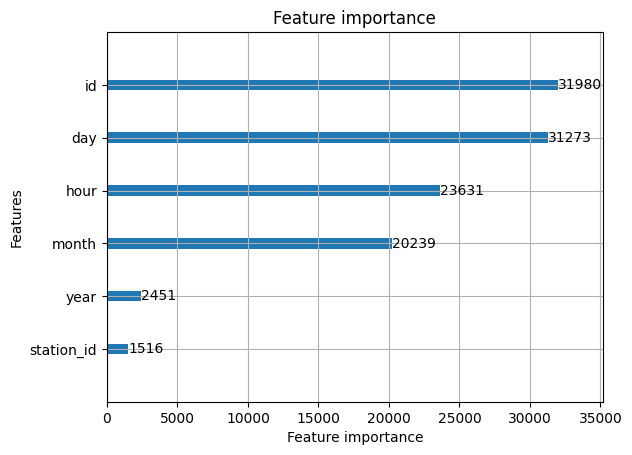

In [71]:
lgb.plot_importance(model)

In [ ]:
models.params

In [70]:
prediction = np.rint(model.predict(val_x, num_iteration=model.best_iteration))
accuracy = accuracy_score(val_y, prediction)

NameError: name 'val_x' is not defined

In [56]:
best_params, tuning_history = dict(), list()

In [58]:
model = lgb.train(params, lgb_train, 
                  num_boost_round=num_round, 
                  valid_names=['train', 'valid'], 
                  valid_sets=[lgb_train, lgb_eval],
                  early_stopping_rounds=20
                 )

NameError: name 'lgb_train' is not defined

In [57]:
booster = lgb.train(params, dtrain, valid_sets=dval,
                    verbose_eval=0,
                    best_params=best_params,
                    tuning_history=tuning_history)

print('Best Params:', best_params)
print('Tuning history:', tuning_history)

TypeError: LightGBMTuner.__init__() got an unexpected keyword argument 'best_params'